In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer

In [82]:
df = pd.read_csv("spam.csv",encoding='latin')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [83]:
df.shape

(5572, 5)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [85]:
df = df[['v1','v2']]
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [86]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [87]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [88]:
df['target'] = encoder.fit_transform(df['target'])
df.head(2)

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...


In [89]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [90]:
#checkimg for duplicate values
df.duplicated().sum()

np.int64(403)

In [91]:
#removing duplicate values
df = df.drop_duplicates(keep='first')

In [92]:
df.duplicated().sum()

np.int64(0)

In [93]:
df.shape

(5169, 2)

### EDA

In [94]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [95]:
value_count = df['target'].value_counts()
value_count

target
0    4516
1     653
Name: count, dtype: int64

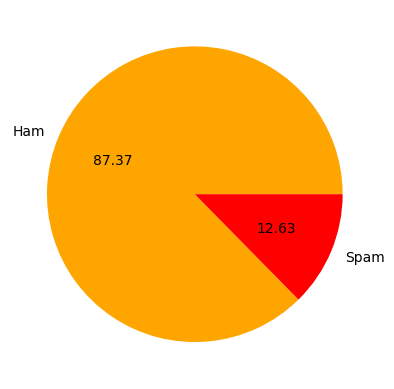

In [96]:
plt.pie(value_count,labels=['Ham','Spam'],autopct="%0.2f",colors=['orange','red'])
plt.show()

In [ ]:
# nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\vicky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [98]:
#Number of characters
df['num_characters'] = df['text'].apply(len)
df.head(1)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111


In [99]:
# import nltk
# nltk.download('all')

In [100]:
#number of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [101]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [102]:
#number of sentences
df['num_sentence'] = df['text'].apply(lambda x : len (nltk.sent_tokenize(x)))

In [103]:
df.head(2)

,target,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2


In [104]:
df[['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [105]:
#for ham
df[df['target'] == 0][['num_characters','num_words','num_sentence']].describe()

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [106]:
#for spam
df[df['target'] == 1][['num_characters','num_words','num_sentence']].describe()


,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


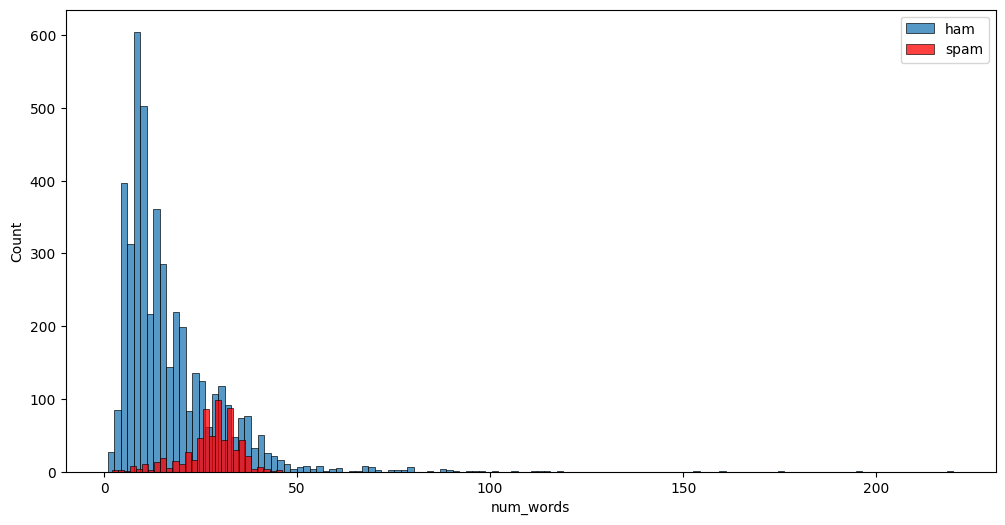

In [108]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'],label='ham')
sns.histplot(df[df['target'] == 1]['num_words'],color='red',label='spam')
plt.legend()

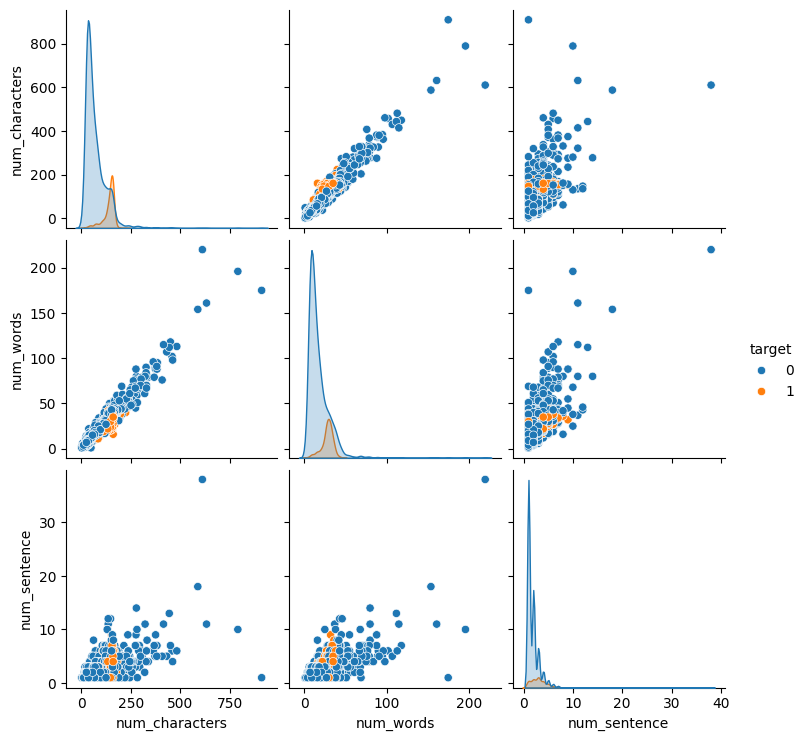

In [109]:
sns.pairplot(df,hue='target')

In [110]:
df[["target","num_characters","num_words","num_sentence"]].corr()


,target,num_characters,num_words,num_sentence
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentence,0.263939,0.624139,0.679971,1.000000


<Axes: >

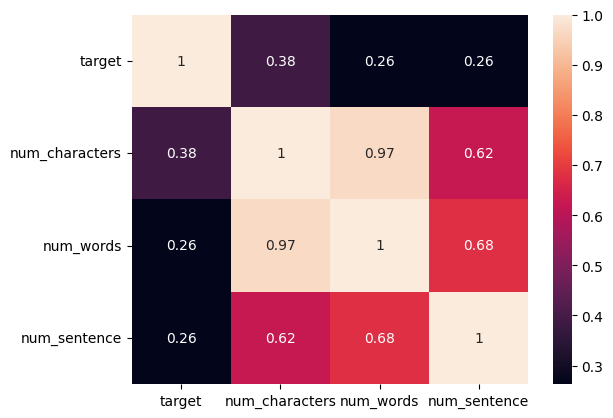

In [111]:
sns.heatmap(df[["target","num_characters","num_words","num_sentence"]].corr(),annot=True)

### Data Preprocesing
1. Lower Case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming

In [112]:
def transform_text(text):
    #lowercase
    text = text.lower()
    #tokenization
    text = nltk.word_tokenize(text)

    processed_text=[]
    #removing special characters
    for i in text:
        if i.isalnum():
            processed_text.append(i)

    text=processed_text[:]
    processed_text.clear()

    #removing stop words
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            processed_text.append(i)

    text = processed_text[:]
    processed_text.clear()

    ps = PorterStemmer()
    #stemming
    for i in text:
        processed_text.append(ps.stem(i))
    return " ".join(processed_text)

In [113]:
df['transformedText'] = df['text'].apply(transform_text)

In [114]:
df.head(2)

,target,text,num_characters,num_words,num_sentence,transformedText
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni


In [115]:
from wordcloud import WordCloud
wc = WordCloud(width=400,height=400,min_font_size=10,background_color='white')

In [116]:
spam_wc = wc.generate(df[df['target'] == 1]['transformedText'].str.cat(sep=" "))

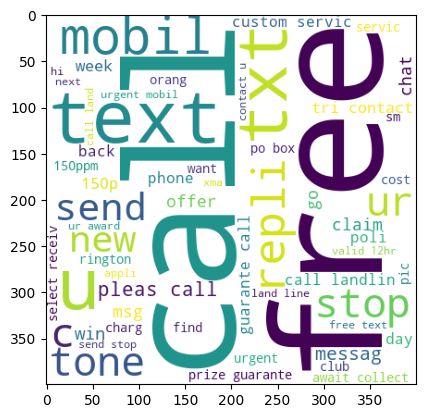

In [117]:
plt.imshow(spam_wc)

In [118]:
ham_wc = wc.generate(df[df['target'] == 0]['transformedText'].str.cat(sep=" "))


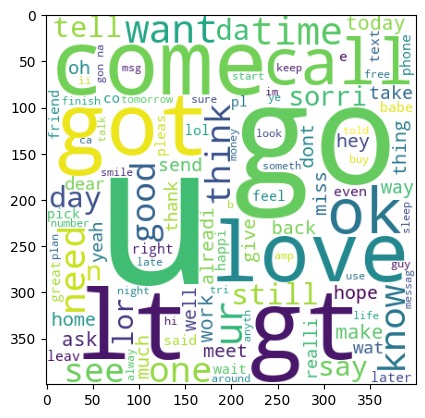

In [119]:
plt.imshow(ham_wc)

In [120]:
from collections import Counter

In [121]:
spamCorpus = []
for x in df[df['target'] == 1]['transformedText'].tolist():
    for word in x.split():
        spamCorpus.append(word)
len(spamCorpus)

9939

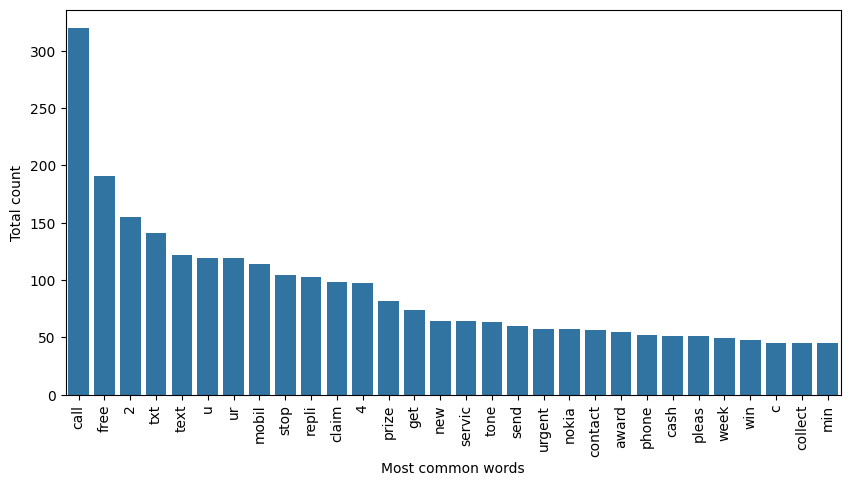

In [122]:
#top 30 words in the spam msg plot
spamCommonWords = pd.DataFrame(Counter(spamCorpus).most_common(30))
ax,fig = plt.subplots(figsize=(10,5))
sns.barplot(x=0,y=1,data=spamCommonWords)
plt.xticks(rotation='vertical')
plt.ylabel("Total count")
plt.xlabel("Most common words")
plt.show()

In [123]:
hamCorpus = []
for x in df[df['target'] == 0]['transformedText'].tolist():
    for word in x.split():
        hamCorpus.append(word)
len(hamCorpus)

35404

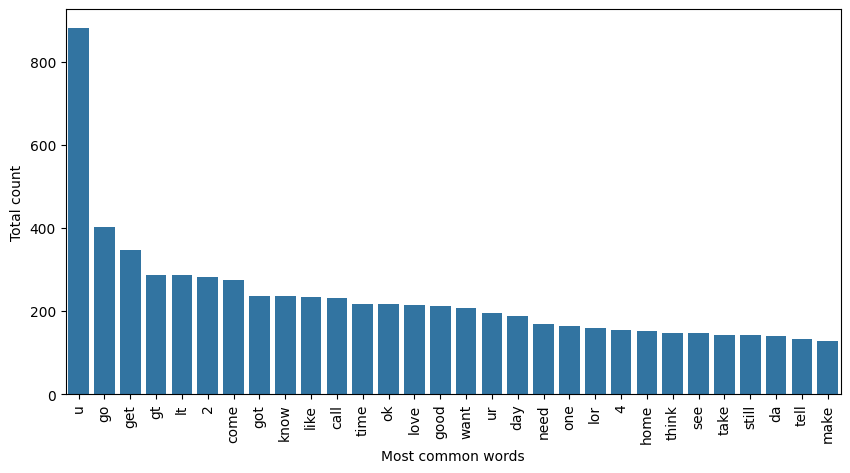

In [124]:
#top 30 words in the ham msg plot
hamCommonWords = pd.DataFrame(Counter(hamCorpus).most_common(30))
ax,fig = plt.subplots(figsize=(10,5))
sns.barplot(x=0,y=1,data=hamCommonWords)
plt.xticks(rotation='vertical')
plt.ylabel("Total count")
plt.xlabel("Most common words")
plt.show()

### Model Building


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfd=TfidfVectorizer(max_features=3000)

In [126]:
X = tfd.fit_transform(df['transformedText']).toarray()

In [127]:
X.shape

(5169, 3000)

In [128]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [131]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix

In [132]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [133]:
list_bayes = [gnb,mnb,bnb]

In [134]:
gnb.fit(X_train,y_train)
y_pred=gnb.predict(X_test)
print("For gnb:")
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

For gnb:
0.874274661508704
0.5181818181818182
[[790 106]
 [ 24 114]]


In [135]:
mnb.fit(X_train,y_train)
y_pred=mnb.predict(X_test)
print("For mnb:")
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

For mnb:
0.9709864603481625
1.0
[[896   0]
 [ 30 108]]


In [136]:
bnb.fit(X_train,y_train)
y_pred=bnb.predict(X_test)
print("For bnb:")
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))

For bnb:
0.9835589941972921
0.991869918699187
[[895   1]
 [ 16 122]]


Here in this analysis or model the precesion score is more important.


In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier


In [148]:
svc = SVC(kernel='sigmoid',gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)


In [149]:
clfs = {
    'svc': svc,
    'knc':knc,
    'mnb':mnb,
    'dtc':dtc,
    'lrc':lrc,
    'rfc':rfc,
    'etc':etc,
}

In [150]:
def differentClassifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    return accuracy,precision

In [152]:
accuracy_scores =[]
precision_scores=[]

for name,clf in clfs.items():
    acc_score,prec_score = differentClassifier(clf,X_train,y_train,X_test,y_test)
    print("For ",name)
    print('accuracy_score ',acc_score)
    print('precision_score ',prec_score)

    accuracy_scores.append(acc_score)
    precision_scores.append(prec_score)

For  svc
accuracy_score  0.9758220502901354
precision_score  0.9747899159663865
For  knc
accuracy_score  0.9052224371373307
precision_score  1.0
For  mnb
accuracy_score  0.9709864603481625
precision_score  1.0
For  dtc
accuracy_score  0.9332688588007737
precision_score  0.8415841584158416
For  lrc
accuracy_score  0.9555125725338491
precision_score  0.96
For  rfc
accuracy_score  0.9738878143133463
precision_score  0.9826086956521739
For  etc
accuracy_score  0.9748549323017408
precision_score  0.9745762711864406


In [ ]:
performance_df = pd.DataFrame({'ALgorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [153]:
performance_df.sort_values(by=['Precision','Accuracy'],ascending=False)

,ALgorithm,Accuracy,Precision
2,mnb,0.970986,1.000000
1,knc,0.905222,1.000000
5,rfc,0.973888,0.982609
0,svc,0.975822,0.974790
8,etc,0.974855,0.974576
6,abc,0.969052,0.973214
4,lrc,0.955513,0.960000
9,gbd,0.950677,0.930693
7,bc,0.958414,0.868217
3,dtc,0.934236,0.850000


In [145]:
#model improve
#1.Change the max_features parameters of TFIDF 

In [146]:
import pickle
pickle.dump(tfd,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))
